In [35]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, tree, export_graphviz
import matplotlib
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, roc_curve,auc
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image  
import pydotplus
import graphviz
from sklearn import tree

In [2]:
cars = pd.read_csv('car_evaluation.csv')

In [3]:
cars.shape

(1727, 7)

In [4]:
cars.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [5]:
cars.dtypes

vhigh      object
vhigh.1    object
2          object
2.1        object
small      object
low        object
unacc      object
dtype: object

In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 47.3+ KB


In [7]:
cars.describe()

,vhigh,vhigh.1,2,2.1,small,low,unacc
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,low,low,3,4,big,med,unacc
freq,432,432,432,576,576,576,1209


In [8]:
cars.vhigh.unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [9]:
cars.vhigh.value_counts()

low      432
med      432
high     432
vhigh    431
Name: vhigh, dtype: int64

In [10]:
cars.rename(columns={'vhigh':'BuyingPrice',
                     'vhigh.1':"MaintenanceCost",
                     '2':"Doors",
                     '2.1':"Persons",
                     'small':"LugBoot",
                     'low':"Safety",
                     'unacc':"Decision"},
            inplace=True)

In [11]:
cars.head()

,BuyingPrice,MaintenanceCost,Doors,Persons,LugBoot,Safety,Decision
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [12]:
cars.tail()

,BuyingPrice,MaintenanceCost,Doors,Persons,LugBoot,Safety,Decision
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good
1726,low,low,5more,more,big,high,vgood


In [13]:
cols = ['BuyingPrice','MaintenanceCost','Doors','Persons','LugBoot','Safety']

cars = pd.get_dummies(cars,columns=cols,drop_first=True)

In [14]:
cars.head()

,Decision,BuyingPrice_low,BuyingPrice_med,BuyingPrice_vhigh,MaintenanceCost_low,MaintenanceCost_med,MaintenanceCost_vhigh,Doors_3,Doors_4,Doors_5more,Persons_4,Persons_more,LugBoot_med,LugBoot_small,Safety_low,Safety_med
0,unacc,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1
1,unacc,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
2,unacc,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0
3,unacc,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1
4,unacc,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0


In [15]:
lbenc = LabelEncoder()
cars.Decision = lbenc.fit_transform(cars.Decision)

In [16]:
X = cars.drop(columns='Decision', axis=1)

Y = cars.Decision

In [17]:
print(X.shape)
print(Y.shape)

(1727, 15)
(1727,)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3,random_state = 42)

In [19]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1208, 15)
(1208,)
(519, 15)
(519,)


In [20]:
params = {
    'max_depth' : [1,3,5,7,8,11,20],
    'min_samples_split' : [3,5,7,9,10,25],
    'criterion' : ['gini','entropy']
}

dt = DecisionTreeClassifier()
model_grid = GridSearchCV(dt, param_grid = params, cv=10)
model_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 5, 7, 8, 11, 20],
                         'min_samples_split': [3, 5, 7, 9, 10, 25]})

In [21]:
model_grid.best_params_

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 5}

In [51]:
model_dt = DecisionTreeClassifier(criterion='gini', max_depth=7, min_samples_split= 5)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_split=5)

In [52]:
y_pred = model_dt.predict(X_test)

In [53]:
accuracy_score(y_test, y_pred)

0.882466281310212

In [54]:
y_pred_train = model_dt.predict(X_train)

In [55]:
accuracy_score(y_train, y_pred_train)

0.9089403973509934

In [56]:
cars.columns[1:]

Index(['BuyingPrice_low', 'BuyingPrice_med', 'BuyingPrice_vhigh',
       'MaintenanceCost_low', 'MaintenanceCost_med', 'MaintenanceCost_vhigh',
       'Doors_3', 'Doors_4', 'Doors_5more', 'Persons_4', 'Persons_more',
       'LugBoot_med', 'LugBoot_small', 'Safety_low', 'Safety_med'],
      dtype='object')

<IPython.core.display.Javascript object>

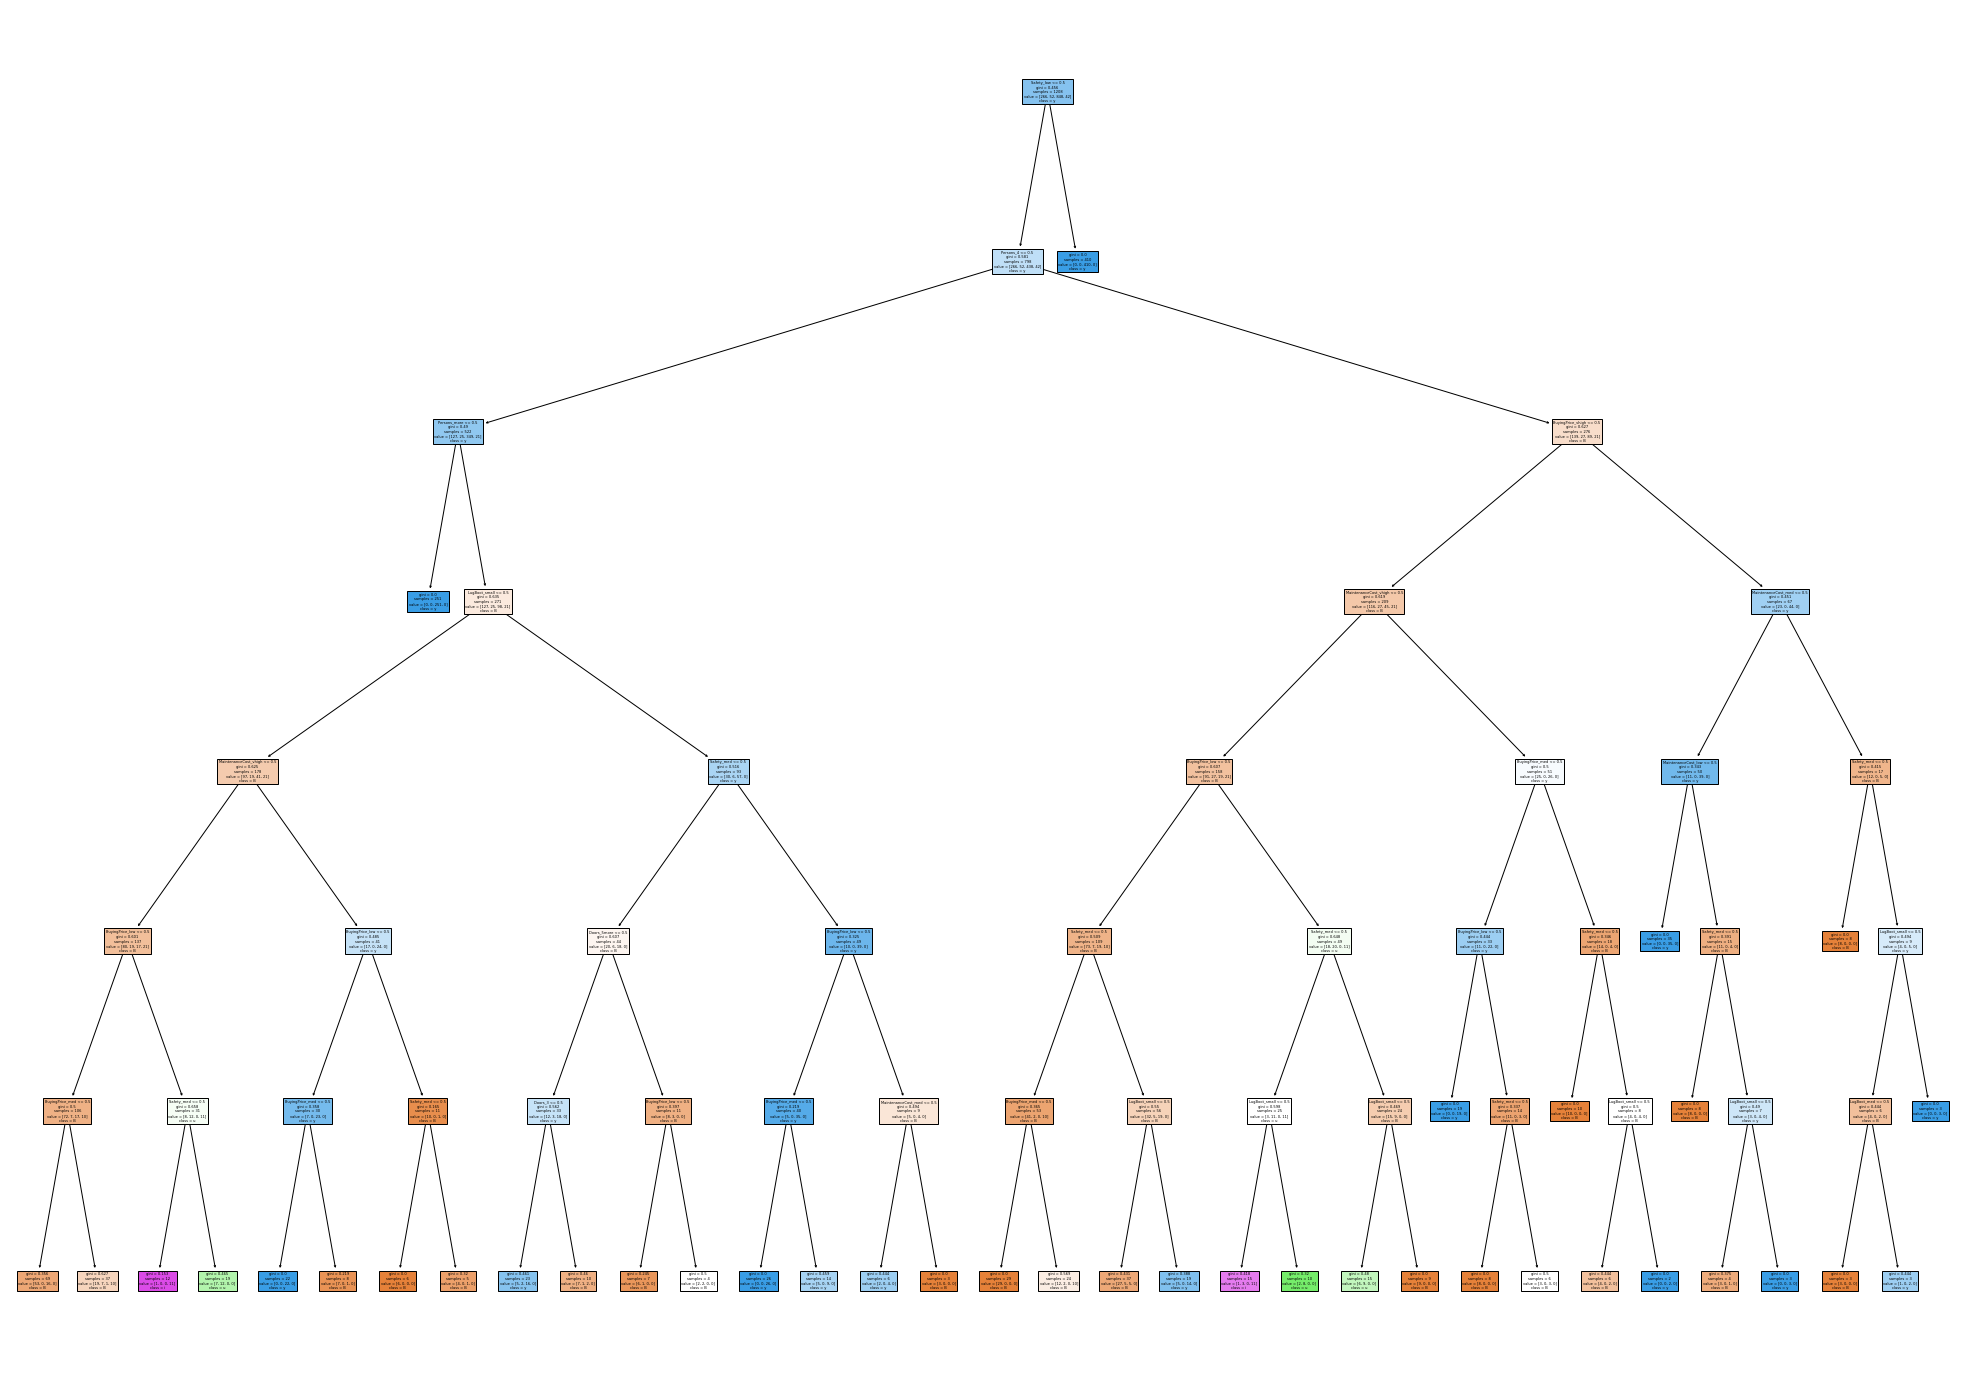

In [58]:
fig = plt.figure(figsize=(35,25))

tree.plot_tree(model_dt, feature_names=cars.columns[1:], class_names=cars.columns[1],filled=True)

fig.savefig('final_dt.png')
